In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [168]:
from scipy.io import wavfile

[0 0 0 ..., 0 0 0]


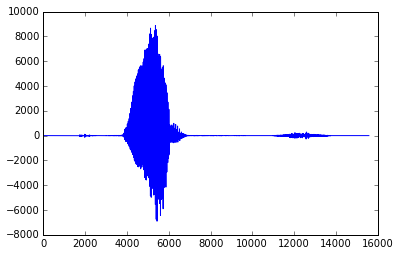

In [169]:
fs, sig = wavfile.read('FDC_1A.wav') 
# print("sampling rate = {} Hz, length = {} samples, channels = {}".format(fs, *sig.shape))
print(sig)
plot(sig);

In [170]:
a = range(10)
N = 2
np.convolve(x,  np.ones((N,))/N, mode='valid')

array([ 0.5,  1.5,  2.5,  4. ,  5.5,  6.5,  7.5,  8. ,  7.5,  6.5,  5.5,
        4.5,  3.5,  2.5,  1.5,  0.5])

In [171]:
x = range(9) + list(reversed(range(9)))

def crop1D_list(lst, win_size):
    # lst is a list of data, win_size is the moving average window size
    
    # square the list
    squares = [x ** 2 for x in lst]
     
    # take a moving average with window size N
    moving_avg = np.convolve(squares,  np.ones((win_size,))/win_size, mode='valid')
    
    # find threshold
    threshold = max(moving_avg)/10
    
    # find timepoint larger than threshold and last time point smaller than threshold 
    first = next(x[0] for x in enumerate(moving_avg) if x[1] > threshold)
    last = next(x[0] for x in enumerate(reversed(moving_avg)) if x[1] > threshold)

    
    # get cropped list
    out = moving_avg[first:-last]

    print squares
    print moving_avg
    print threshold
    print first
    print last
    print out
    return

crop1D_list(x, 2)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 64, 49, 36, 25, 16, 9, 4, 1, 0]
[  0.5   2.5   6.5  12.5  20.5  30.5  42.5  56.5  64.   56.5  42.5  30.5
  20.5  12.5   6.5   2.5   0.5]
6.4
2
2
[  6.5  12.5  20.5  30.5  42.5  56.5  64.   56.5  42.5  30.5  20.5  12.5
   6.5]


In [172]:
lst = [0, 1, 2, 3, 5, 1, 3, 4, 3, 2, 1]

def first_last_idx(lst, threshold):
    
    # find first
    first = next(x[0] for x in enumerate(lst) if x[1] > threshold)
    
    # find last
    last = next(x[0] for x in enumerate(reversed(lst)) if x[1] > threshold)

    
    print first
    print last
    
    # get cropped list
    print lst[first:-last]
    
    return

first_last_idx(lst, 2.5)

3
2
[3, 5, 1, 3, 4, 3]


In [173]:
print lst
print list(enumerate(lst))
print list(enumerate(reversed(lst)))

[0, 1, 2, 3, 5, 1, 3, 4, 3, 2, 1]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 5), (5, 1), (6, 3), (7, 4), (8, 3), (9, 2), (10, 1)]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 3), (5, 1), (6, 5), (7, 3), (8, 2), (9, 1), (10, 0)]


In [174]:
a[2:-3]

[2, 3, 4, 5, 6]

In [175]:
x = range(9) + list(reversed(range(9)))
print x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [176]:
abs(-5)

5

In [177]:
x = np.array([0,1,2,3,5,6,7,8,8,7,6,5,4,3,2,1,0])
x1 = [0,1,2,3,5,6,7,8,8,7,6,5,4,3,2,1,0]
def crop_timepoints_1_array(np1Darray, win_size, thresh_ratio):
    # lst is a list of data, win_size is the moving average window size
    
    # absolute values (so moving average stays positive)
    abs_val = [abs(x) for x in np1Darray]
     
    # take a moving average with window size N
    moving_avg = np.convolve(abs_val,  np.ones((win_size,))/win_size, mode='valid')
    
    # find threshold
    threshold = max(moving_avg) * thresh_ratio
    
    # find timepoint larger than threshold and last time point smaller than threshold 
    first = next(x[0] for x in enumerate(moving_avg) if x[1] > threshold)
    last = next(x[0] for x in enumerate(reversed(moving_avg)) if x[1] > threshold)

    
    # get cropped list
    #out = moving_avg[first:-last]

    #print squares
    #print moving_avg
    #print threshold
    #print first
    #print last
    #print out
    return first, len(moving_avg) - last + win_size

crop_timepoints_1_array(x1, 2, 0.1)

(1, 17)

[0 0 0 ..., 0 0 0]


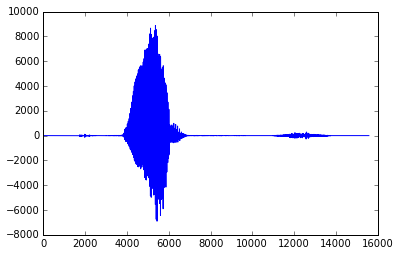

In [178]:
fs, sig = wavfile.read('FDC_1A.wav') 
# print("sampling rate = {} Hz, length = {} samples, channels = {}".format(fs, *sig.shape))
print(sig)
plot(sig)

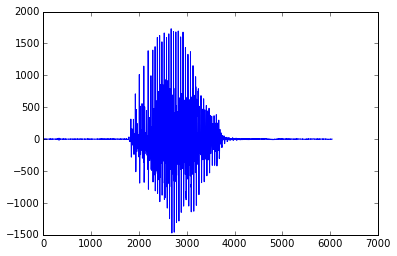

In [179]:
fs2, sig2 = wavfile.read('FAC_1A.wav') 
# print("sampling rate = {} Hz, length = {} samples, channels = {}".format(fs, *sig.shape))
plot(sig2)

(3234, 7007)
(1016, 4537)


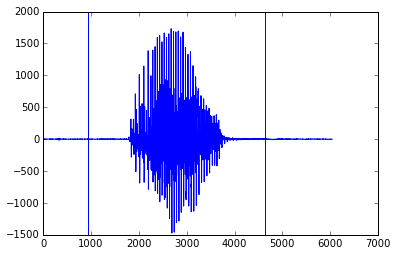

In [180]:
print crop_1_array(sig, 1000, 0.1)
print crop_1_array(sig2, 1000, 0.1)

plot(sig2)
first, last = crop_1_array(sig2, 1000, 0.05)
axvline(first)
axvline(last)

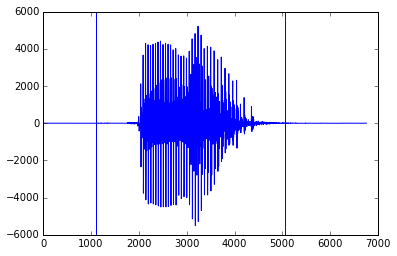

In [181]:
# function to take .wav, find cropping time points and print

def plot_crop_points_file(wfile, win_size, thresh_ratio):
    
    fs, sig = wavfile.read(wfile) 

    
    plot(sig)
    
    first, last = crop_timepoints_1_array(sig, win_size, thresh_ratio)
    axvline(first)
    axvline(last)
    return

plot_crop_points_file('MBD_4A.wav', 1000, 0.05)

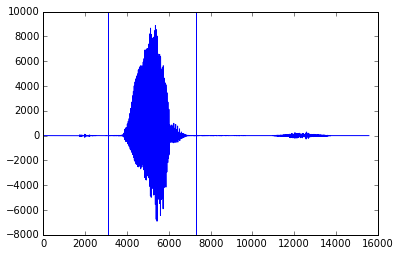

In [182]:
# function to take a waveform (already read in), find cropping time points and print

def plot_crop_points_sig(sig, win_size, thresh_ratio):
    
    plot(sig)
    
    first, last = crop_timepoints_1_array(sig, win_size, thresh_ratio)
    axvline(first)
    axvline(last)
    return

plot_crop_points_sig(sig, 1000, 0.05)

In [183]:
# list of arrays
a1 = np.array([1,3,6,4,3,0])
a2 = np.array([0,1,4,1,3,5,4,3,1])
a3 = np.array([1,5,8,7,3,7,3,2])
list_arrays = [a1, a2, a3]

print list_arrays
type(list_arrays)

[array([1, 3, 6, 4, 3, 0]), array([0, 1, 4, 1, 3, 5, 4, 3, 1]), array([1, 5, 8, 7, 3, 7, 3, 2])]


list

In [195]:
# apply crop_1_array to each item of a list

print crop_timepoints_1_array(a1, 2, 0.1)

def crop_timepoints_list_arrays(list_array, win_size, thresh_ratio):
    cropped = []
    for array in list_array:
        cropped.append(crop_timepoints_1_array(array, win_size, thresh_ratio))
    
    return cropped

crop_list_arrays(list_arrays, 2, 0.1)

(0, 7)


[array([1, 3, 6, 4, 3, 0]),
 array([0, 1, 4, 1, 3, 5, 4, 3, 1]),
 array([1, 5, 8, 7, 3, 7, 3, 2])]

In [184]:
# apply crop_1_array to each item of a list

print crop_1_array(a1, 2, 0.1)

def crop_list_arrays(list_array, win_size, thresh_ratio):
    cropped = []
    for array in list_array:
        cropped.append(crop_1_array(array, win_size, thresh_ratio))
    
    return cropped

crop_list_arrays(list_arrays, 2, 0.1)

(0, 7)


[(0, 7), (0, 10), (0, 9)]

In [185]:
t1 = crop_1_array(sig, 1000, 0.05)
t2 = crop_1_array(sig2, 1000, 0.05)
t3 = crop_1_array(sig3, 1000, 0.05)

print t1, t2, t3


(3118, 7286) (933, 4633) (2102, 4870)


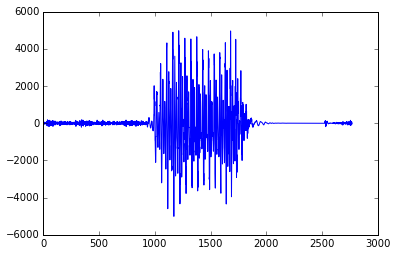

In [200]:
sig_list = [sig, sig2, sig3]

crop_timepoints_list_arrays(sig_list, 1000, 0.05)

cropped_list = crop_list_arrays(sig_list, 1000, 0.05)

plot(cropped_list[2])

# crop_list_arrays(sig_list, 1000, 0.05)

(3118, 7286)


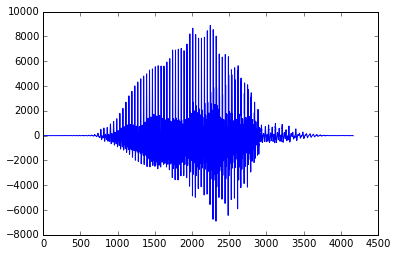

In [193]:
# function to crop an array

def crop_1_array(array, win_size, thresh_ratio):
    
    first, last = crop_timepoints_1_array(array, win_size, thresh_ratio)
    out = array[first:last]
    return out

sig_crop = crop_1_array(sig, 1000, 0.05)

print(crop_timepoints_1_array(sig, 1000, 0.05))
plot(sig_crop)

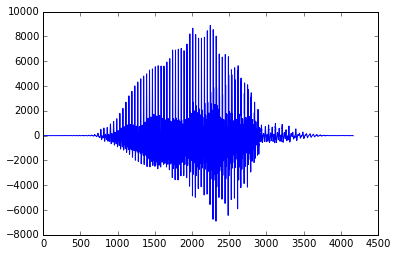

In [194]:
plot(sig[3118:7286])